In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
#read the file
df = pd.read_csv("/Users/agustincastro/Downloads/Javi/ML/train.csv")

In [4]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [84]:
#prepare the data
df["label"] = df["label"].replace(-1,value=0)
df=df.drop(["id"],axis =1) #discard inmediatly the variable 'id' because our prediction is not based in a user id

#now want see if the time spent online have relationship with the purchase
#first calculate the time spent (in seconds)
def cal_purchase_time(data):
    if data["purchaseTime"] != -1:
        return data["purchaseTime"] - data["visitTime"]
    else:
        return 0

In [85]:
#study the variable of prediction
df['label'].value_counts()

0    31371
1       57
Name: label, dtype: int64

Here, we noticed that the data is super unbalanced..

In [86]:
df["timeofPurchase"] = df.apply(cal_purchase_time,axis=1)
df["timeofPurchase"]

0        0
1        0
2        0
3        0
4        0
        ..
31423    0
31424    0
31425    0
31426    0
31427    0
Name: timeofPurchase, Length: 31428, dtype: int64

In [8]:
#here I just want to see if the previous fuction worked for the column [timeofPurchase]
print(df.loc[[259]])

     label  visitTime  purchaseTime  hour          C1          C2          C3  \
259      1   19276848      19278072     0  4211266787  1235983246  3481754642   

            C4          C5          C6  ...  N5  N6  N7  N8  N9  N10  \
259  652481754  2116767313  4003458018  ...   0   0   0  20   1    1   

            C10         C11         C12  timeofPurchase  
259  2878214472  3831440054  1213938795            1224  

[1 rows x 27 columns]


It worked! now we have the time spent in a purchase (in sec)

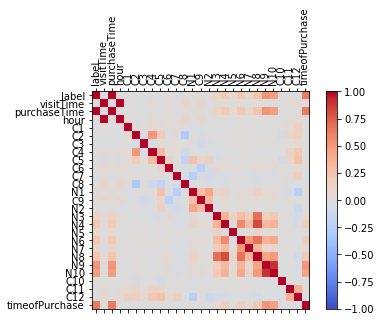

In [7]:
#now draw correlation matrix to understand the relationship between variables
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

From the previous graph we can observe that most of the Categorical variables (C) don't have a high correlation with the variable of study 'label', not sure yet if we should take all these variables... so, I draw a corr matrix to understand it better

In [54]:
df.corr()

,label,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,C6,...,N5,N6,N7,N8,N9,N10,C10,C11,C12,timeofPurchase
label,1.000000,0.005782,1.000000,0.005959,-0.002729,0.003435,-0.000707,-0.005857,0.008654,0.017486,...,0.071254,0.230524,0.092622,0.232069,0.514412,0.470503,-0.005066,-0.001280,-0.016744,0.635765
visitTime,0.005782,1.000000,0.005815,0.998092,0.011742,-0.021600,-0.011627,0.051565,-0.040371,0.059132,...,0.006853,0.014143,-0.000400,0.036550,0.013527,0.012626,-0.000176,0.051994,0.072373,0.013173
purchaseTime,1.000000,0.005815,1.000000,0.005992,-0.002730,0.003442,-0.000712,-0.005860,0.008663,0.017483,...,0.071303,0.230528,0.092630,0.232101,0.514525,0.470614,-0.005069,-0.001278,-0.016742,0.636031
hour,0.005959,0.998092,0.005992,1.000000,0.011623,-0.021613,-0.012099,0.051268,-0.039976,0.058947,...,0.006560,0.014412,-0.000202,0.037086,0.013552,0.012575,-0.000184,0.052295,0.071955,0.012993
C1,-0.002729,0.011742,-0.002730,0.011623,1.000000,0.024736,0.021227,0.042015,0.049402,0.013999,...,-0.005202,0.010162,0.005695,-0.013904,-0.006939,-0.011425,0.000293,0.072482,0.148559,-0.002177
C2,0.003435,-0.021600,0.003442,-0.021613,0.024736,1.000000,-0.033626,0.522098,0.188290,-0.024301,...,-0.003979,0.021354,0.005619,0.004571,0.007887,0.010729,-0.055098,0.111602,0.133126,0.005772
C3,-0.000707,-0.011627,-0.000712,-0.012099,0.021227,-0.033626,1.000000,-0.051367,0.035305,0.011187,...,0.008495,0.002335,-0.003647,0.002815,0.003306,0.004317,0.000864,0.021532,0.074496,-0.001010
C4,-0.005857,0.051565,-0.005860,0.051268,0.042015,0.522098,-0.051367,1.000000,0.301824,0.018999,...,-0.005169,0.003998,-0.006557,-0.018941,-0.008732,-0.006200,-0.022361,0.128080,0.211202,-0.007372
C5,0.008654,-0.040371,0.008663,-0.039976,0.049402,0.188290,0.035305,0.301824,1.000000,0.125719,...,-0.020289,0.024300,0.005445,0.007496,0.015806,0.018107,-0.093148,0.109476,0.265741,0.010988
C6,0.017486,0.059132,0.017483,0.058947,0.013999,-0.024301,0.011187,0.018999,0.125719,1.000000,...,0.020634,0.019519,-0.000492,0.069547,0.024832,0.029970,0.016071,-0.008306,0.039842,0.006086


After doing the correlation matrix, we can observe that 'purchaseTime' has a very high correlation with the variable of study 'label'. Additionally, 'visitTime' is highly correlated to 'hour', for this reason we drop 'purchaseTime' and 'visitTime' 

In [105]:
df2 = df.drop(['purchaseTime', 'visitTime'], axis=1)

In [106]:
df2.columns

Index(['label', 'hour', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1',
       'C9', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'C10',
       'C11', 'C12', 'timeofPurchase'],
      dtype='object')

In [10]:
#Now, import the ML libraries
import sklearn
import mglearn
from sklearn.model_selection import train_test_split

In [107]:
#define X,y to start modeling
X = df2.loc[:, df2.columns != 'label']
y = df2['label']

In [127]:
#Now, because our data set is unbalanced, we use *SMOTE*
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
columns = X_train.columns
X_train, y_train=os.fit_sample(X_train, y_train)
X_train= pd.DataFrame(data=X_train,columns=columns )
y_train= pd.DataFrame(data=y_train,columns=['label'])

# we can Check the numbers of our data
print("Length of oversampled data is ",len(X_train))
print("Number of no subscription in oversampled data",len(y_train[y_train['label']==0]))
print("Number of subscription",len(y_train[y_train['label']==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_train[y_train['label']==0])/len(X_train))
print("Proportion of subscription data in oversampled data is ",len(y_train[y_train['label']==1])/len(X_train))

Length of oversampled data is  47052
Number of no subscription in oversampled data 23526
Number of subscription 23526
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a balanced data! (notice that only is over-sampled the training data)

In [135]:
# Balancing the dataset
print(len(y_train))
print("There are {} values equals to 1".format(np.count_nonzero(y_train == 1)))
print("There are {} values equals to 0".format(np.count_nonzero(y_train == 0)))

47052
There are 23526 values equals to 1
There are 23526 values equals to 0


# Logistic Regression Model

In [136]:
logres = LogisticRegression()
logres.fit(X_train,y_train.values.ravel())
Y_pred = logres.predict(X_test)

print(logres.score(X_train, y_train))
print(logres.score(X_test, y_test))

0.7491498767321262
0.7583046964490263


In [130]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Y_pred))

[[5952 1893]
 [   6    6]]


In [131]:
from sklearn.model_selection import cross_val_score
from numpy import mean
scores = cross_val_score(logres, X, y, scoring='roc_auc')
print('ROC AUC: %.4f' % mean(scores))

ROC AUC: 0.7274


# Naives Bayes Model

In [184]:
from sklearn.naive_bayes import GaussianNB
classifier_NB= GaussianNB()
classifier_NB.fit(X_train, y_train.values.ravel())
y_pred_NB= classifier_NB.predict(X_test)

In [185]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_NB))

[[6120 1725]
 [   6    6]]


In [186]:
scores = cross_val_score(classifier_NB, X, y, scoring='roc_auc')
print('ROC AUC: %.4f' % mean(scores))

ROC AUC: 0.7707


Naives Bayes has a bigger AUC, consequently we we will use this model to test the data set 'test.csv' in order to predict the probability of purchase

# Test

In [234]:
df_test= pd.read_csv("/Users/agustincastro/Downloads/Javi/ML/test1.csv")

In [235]:
#prepare the data
df_test["label"] = df_test["label"].replace(-1,value=0)
df_test["timeofPurchase"] = df_test.apply(cal_purchase_time,axis=1)
df_test_1=df_test.drop(['id','purchaseTime', 'visitTime'],axis=1)

In [236]:
#also, we will not consider the variable 'label' because is what we intent to predict
df_test_1=df_test_1.drop(['label'],axis=1)

In [237]:
test_predictions = pd.DataFrame(logres.predict_proba(df_test_1))

In [238]:
df_test_1['Prob_0'] = test_predictions[0]
df_test_1['Prob_1'] = test_predictions[1]

In [239]:
test_score = pd.DataFrame()
test_score['ID'] = df_test['id']
test_score['Prob_0'] = df_test_1['Prob_0']
test_score['Prob_1'] = df_test_1['Prob_1']
test_score.head()

,ID,Prob_0,Prob_1
0,1,0.928566,0.071434
1,2,0.776021,0.223979
2,3,0.751032,0.248968
3,4,0.647055,0.352945
4,5,0.932282,0.067718


In [241]:
df_test['label'].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64